# Some Relations Between B-Splines and $\pi$

## Value of a B-Spline at the Origin
Consider the B-spline $\beta^{n}$ of degree $n$ and let us focus on
the value $\beta^{n}(0)$ that this function takes at the origin. Then,
it turns out that

$$\pi=6\,\lim_{n\rightarrow\infty}\frac{1}{n+1}\,\left(\beta^{n}(0)\right)^{-2}.$$
Let us plot a visual representation of that fact.

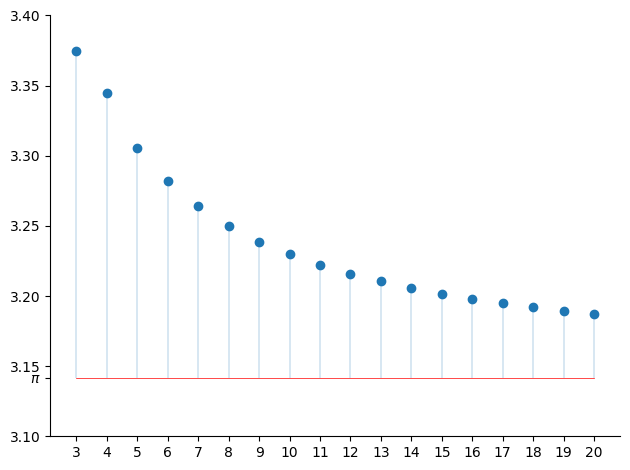

In [1]:
# Load the required libraries.
import math
import matplotlib.pyplot as plt
import numpy as np

import splinekit as sk # This library

# Setup
lowest_degree = 3
highest_degree = 20

# Layout of the plot
(fig, ax) = plt.subplots()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.xticks(range(lowest_degree, highest_degree + 1))
plt.ylim(3.1, 3.4)
(locs, labels) = plt.yticks()
locs = np.append(locs, math.pi)
labels = np.append(labels, plt.text(float("nan"), math.pi, "$\pi$"))
plt.yticks(locs, labels)

# Data
degree = range(lowest_degree, highest_degree + 1)
delta_pi = [
    6 / ((n + 1) * (sk.b_spline(0, n) ** 2))
    for n in degree
]

# Creation and display of the plot
(_, stemlines, baseline) = ax.stem(degree, delta_pi, bottom = math.pi)
baseline.set_alpha(0.0)
stemlines.set_linewidth(0.25)
plt.plot([lowest_degree, highest_degree], [math.pi, math.pi], "-r", linewidth = 0.5)
fig.tight_layout()
plt.show()

## Alternating Sum of Samples

Another relation between B-splines and $\pi$ arises if one computes
the sum of all integer samples of B-splines, with an alternating sign.
Then, it turns out that

$$\pi=2\,\lim_{n\rightarrow\infty}
\left(\frac{1}{2}\,\sum_{k\in{\mathbb{Z}}}\,\left(-1\right)^{k}\,
\beta^{n}(k)\right)^{-\frac{1}{n+1}}.$$
Let us plot a visual representation of that fact.

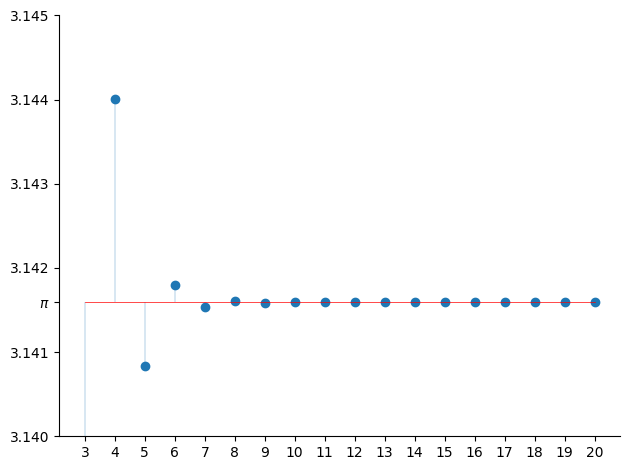

In [1]:
# Load the required libraries.
import math
import matplotlib.pyplot as plt
import numpy as np

import splinekit as sk # This library

# Setup
lowest_degree = 3
highest_degree = 20

# Layout of the plot
(fig, ax) = plt.subplots()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.xticks(range(lowest_degree, highest_degree + 1))
plt.ylim(3.140, 3.145)
(locs, labels) = plt.yticks()
locs = np.append(locs, math.pi)
labels = np.append(labels, plt.text(float("nan"), math.pi, "$\pi$"))
plt.yticks(locs, labels)

# Data
degree = range(lowest_degree, highest_degree + 1)
delta_pi = [
    2.0 * (0.5 * math.fsum(
        ((-1) ** k) * sk.b_spline(k, n)
        for k in range(-(n // 2), n // 2 + 1)
    )) ** (-1 / (n + 1))
    for n in degree
]

# Creation and display of the plot
(_, stemlines, baseline) = ax.stem(degree, delta_pi, bottom = math.pi)
baseline.set_alpha(0.0)
stemlines.set_linewidth(0.25)
plt.plot([lowest_degree, highest_degree], [math.pi, math.pi], "-r", linewidth = 0.5)
fig.tight_layout()
plt.show()